In [1]:
import torch
import matplotlib.pyplot as plt

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def calcular_probabilidad_condicional(p, P_t):
    """
    Calcula la probabilidad condicional P(p | t) para todos los valores de p dado t.

    Args:
    p (torch.Tensor): Tensor con los valores de p.
    P_t (torch.Tensor): Tensor con las ocurrencias de p dado t.

    Returns:
    torch.Tensor: Tensor con las probabilidades condicionales P(p | t).
    """
    total_t = P_t.sum()
    probabilidades = P_t / total_t
    return probabilidades


def graficar_histograma(p, probabilidades, t_value, title, width=80, gauss=False, exponencial=False, lambda_param=0.5):
    """
    Grafica un histograma de las probabilidades condicionales y ajusta una distribución normal.

    Args:
    p (torch.Tensor): Tensor con los valores de p.
    probabilidades (torch.Tensor): Tensor con las probabilidades condicionales.
    t_value (int): Valor de t (0 o 1).
    title (str): Título del histograma.
    """
    # Crear el histograma
    plt.bar(p.numpy(), probabilidades.numpy(), width=width,
            align='center', alpha=0.7, color='blue', edgecolor='black')

    return_pdf = None

    if gauss:
        # Ajustar una distribución normal
        mu = (p * probabilidades).sum()
        sigma = torch.sqrt(((p - mu) ** 2 * probabilidades).sum())

        pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * \
            np.exp(-0.5 * ((p - mu) / sigma) ** 2)
        
        dx = p[1] - p[0]
        pdf = pdf * dx
        
        return_pdf = pdf

        plt.plot(p.numpy(), pdf, color='red', linewidth=2)

    if exponencial:
        # Ajustar una distribución exponencial
        min_p = p.min().item()
        max_p = p.max().item()
        x = np.linspace(min_p, max_p, p.numpy().size)

        # Función de densidad de probabilidad (pdf)
        pdf = lambda_param * np.exp(-lambda_param * x)

        # Normalizar la pdf para que la suma sea 1
        dx = x[1] - x[0]  # Diferencia entre puntos consecutivos
        pdf_normalized = pdf / (pdf.sum() * dx)
        pdf_normalized = pdf_normalized * dx
        plt.plot(x, pdf_normalized, color='red', linewidth=2)

        return_pdf = pdf_normalized


    # Añadir etiquetas y título
    plt.xlabel('P')
    plt.ylabel(f'P(P | t = {t_value})')
    plt.title(title)

    # Mostrar el gráfico
    plt.show()

    return return_pdf


# Variables de precipitaciones
p = torch.tensor([400, 500, 600, 700, 800, 900, 1000,
                 1100, 1200, 1300], dtype=torch.float32)
v = torch.tensor([5, 10, 15, 20, 25, 30, 35, 40, 45, 50], dtype=torch.float32)

# Datos para la variable aleatoria P
P_t0 = torch.tensor([5, 6, 9, 11, 12, 16, 18, 13, 5, 2], dtype=torch.float32)
P_t1 = torch.tensor([20, 13, 12, 4, 2, 1, 2, 1, 2, 1], dtype=torch.float32)

# Datos para la variable aleatoria V
V_t0 = torch.tensor([2, 3, 5, 15, 6, 3, 1, 0, 0, 0], dtype=torch.float32)
V_t1 = torch.tensor([22, 15, 8, 3, 2, 1, 0, 0, 0, 0], dtype=torch.float32)


In [3]:

# Calcular las probabilidades condicionales
probabilidades_p_t0 = calcular_probabilidad_condicional(p, P_t0)
probabilidades_p_t1 = calcular_probabilidad_condicional(p, P_t1)
probabilidades_v_t0 = calcular_probabilidad_condicional(v, V_t0)
probabilidades_v_t1 = calcular_probabilidad_condicional(v, V_t1)

print('Probabilidades condicionales P(p | t = 0):', probabilidades_p_t0)
print('Probabilidades condicionales P(p | t = 1):', probabilidades_p_t1)
print('Probabilidades condicionales P(v | t = 0):', probabilidades_v_t0)
print('Probabilidades condicionales P(v | t = 1):', probabilidades_v_t1)

Probabilidades condicionales P(p | t = 0): tensor([0.0515, 0.0619, 0.0928, 0.1134, 0.1237, 0.1649, 0.1856, 0.1340, 0.0515,
        0.0206])
Probabilidades condicionales P(p | t = 1): tensor([0.3448, 0.2241, 0.2069, 0.0690, 0.0345, 0.0172, 0.0345, 0.0172, 0.0345,
        0.0172])
Probabilidades condicionales P(v | t = 0): tensor([0.0571, 0.0857, 0.1429, 0.4286, 0.1714, 0.0857, 0.0286, 0.0000, 0.0000,
        0.0000])
Probabilidades condicionales P(v | t = 1): tensor([0.4314, 0.2941, 0.1569, 0.0588, 0.0392, 0.0196, 0.0000, 0.0000, 0.0000,
        0.0000])


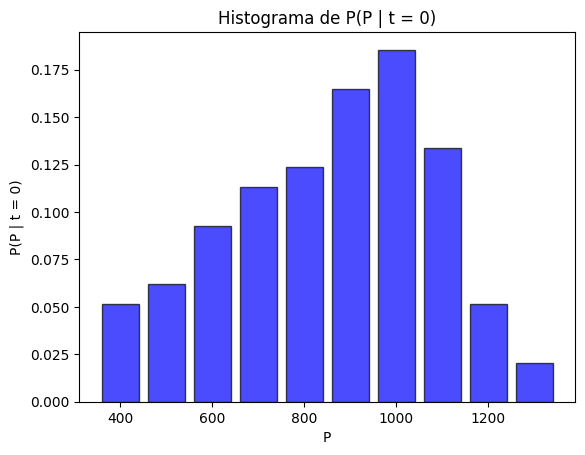

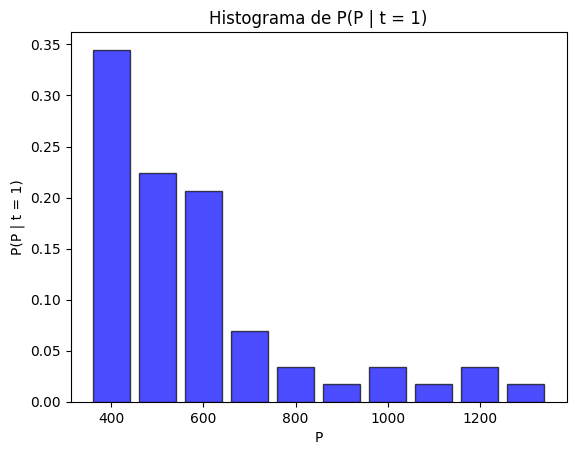

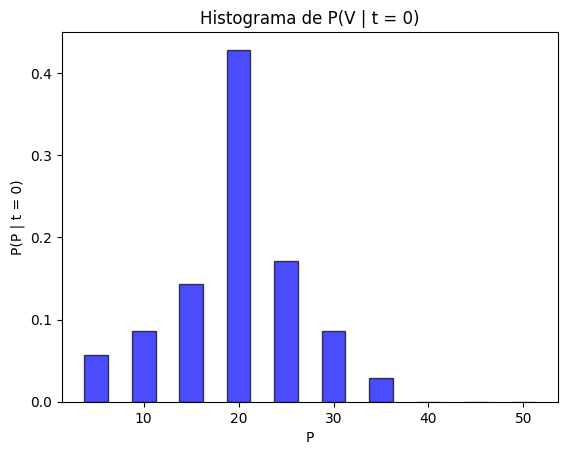

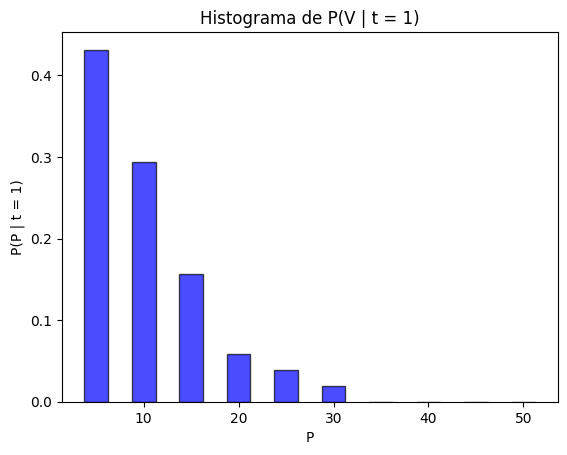

In [4]:

# Graficar los histogramas
graficar_histograma(p, probabilidades_p_t0, 0, 'Histograma de P(P | t = 0)')
graficar_histograma(p, probabilidades_p_t1, 1, 'Histograma de P(P | t = 1)')
graficar_histograma(v, probabilidades_v_t0, 0,
                    'Histograma de P(V | t = 0)',  width=2.5)
graficar_histograma(v, probabilidades_v_t1, 1,
                    'Histograma de P(V | t = 1)', width=2.5)

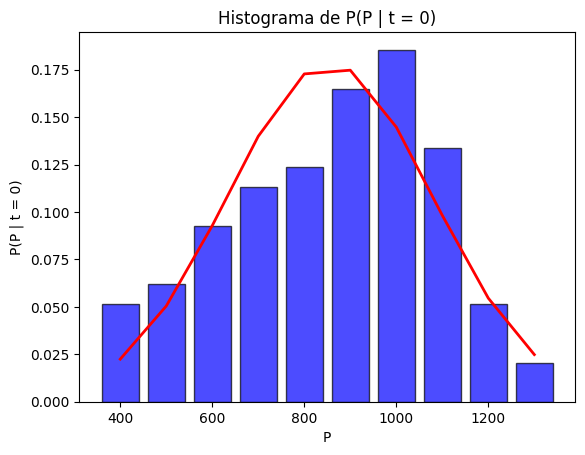

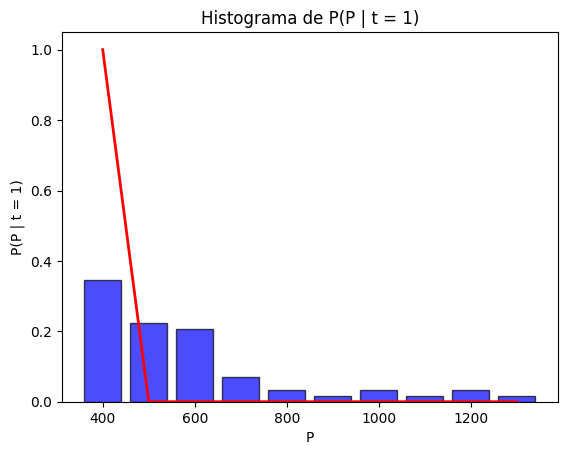

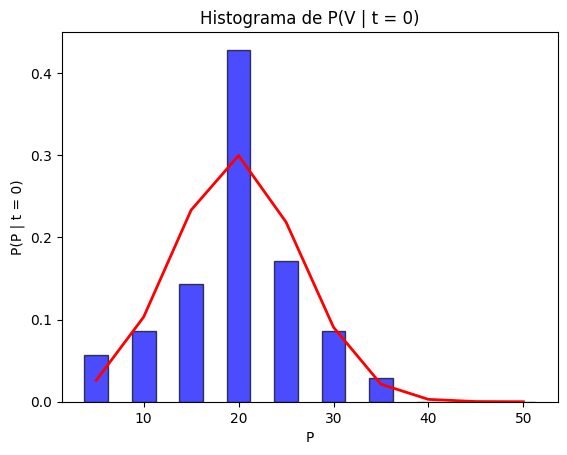

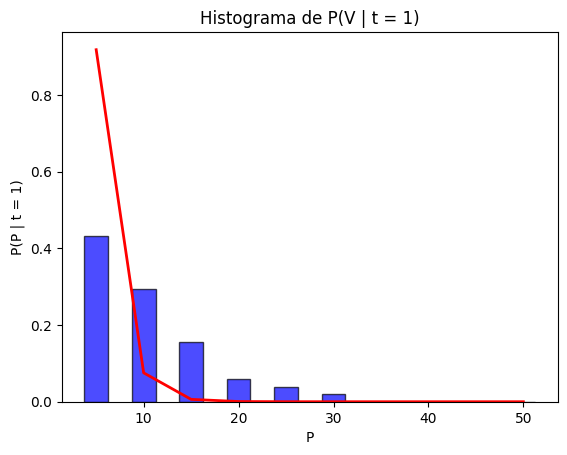

pdf_p_t0: tensor([0.0224, 0.0504, 0.0928, 0.1399, 0.1728, 0.1748, 0.1448, 0.0982, 0.0546,
        0.0248])
pdf_p_t1: [1.00000000e+000 1.92874985e-022 3.72007598e-044 7.17509597e-066
 1.38389653e-087 2.66919022e-109 5.14820022e-131 9.92959040e-153
 1.91516960e-174 3.69388307e-196]
pdf_v_t0: tensor([2.5916e-02, 1.0318e-01, 2.3333e-01, 2.9974e-01, 2.1873e-01, 9.0665e-02,
        2.1348e-02, 2.8553e-03, 2.1694e-04, 9.3625e-06])
pdf_v_t1: [9.17915001e-01 7.53470516e-02 6.18486263e-03 5.07684440e-04
 4.16732766e-05 3.42075085e-06 2.80792329e-07 2.30488379e-08
 1.89196383e-09 1.55301848e-10]


In [9]:
# Graficar los histogramas
pdf_p_t0 = graficar_histograma(p, probabilidades_p_t0, 0, 'Histograma de P(P | t = 0)', gauss=True)
pdf_p_t1 =   graficar_histograma(p, probabilidades_p_t1, 1, 'Histograma de P(P | t = 1)', exponencial=True)
pdf_v_t0 = graficar_histograma(v, probabilidades_v_t0, 0,
                    'Histograma de P(V | t = 0)',  width=2.5, gauss=True)
pdf_v_t1 = graficar_histograma(v, probabilidades_v_t1, 1,
                    'Histograma de P(V | t = 1)', width=2.5, exponencial=True)

print('pdf_p_t0:', pdf_p_t0)
print('pdf_p_t1:', pdf_p_t1)
print('pdf_v_t0:', pdf_v_t0)
print('pdf_v_t1:', pdf_v_t1)

In [10]:

probabilidades_p_t0 = calcular_probabilidad_condicional(p, P_t0)
probabilidades_p_t1 = calcular_probabilidad_condicional(p, P_t1)
probabilidades_v_t0 = calcular_probabilidad_condicional(v, V_t0)
probabilidades_v_t1 = calcular_probabilidad_condicional(v, V_t1)

# Definir las entradas
m1 = 500
m2 = 10

# Encontrar los índices correspondientes a m1 y m2
index_p = (p == m1).nonzero(as_tuple=True)[0].item()
index_v = (v == m2).nonzero(as_tuple=True)[0].item()

# Calcular las probabilidades a priori
P_t1_prior = 0.5  # Asumimos que P(t=1) = P(t=0) = 0.5
P_t0_prior = 0.5

# Calcular las probabilidades condicionales
P_m1_given_t1 = probabilidades_p_t1[index_p].item()
P_m2_given_t1 = probabilidades_v_t1[index_v].item()
P_m1_given_t0 = probabilidades_p_t0[index_p].item()
P_m2_given_t0 = probabilidades_v_t0[index_v].item()

# Calcular las probabilidades marginales
P_m1 = P_m1_given_t1 * P_t1_prior + P_m1_given_t0 * P_t0_prior
P_m2 = P_m2_given_t1 * P_t1_prior + P_m2_given_t0 * P_t0_prior

# Aplicar el teorema de Bayes
P_t1_given_m1_m2 = (P_m1_given_t1 * P_m2_given_t1 * P_t1_prior) / (P_m1 * P_m2)
P_t0_given_m1_m2 = (P_m1_given_t0 * P_m2_given_t0 * P_t0_prior) / (P_m1 * P_m2)

# Mostrar los resultados
print(f"P(t=1 | P={m1}, V={m2}) = {P_t1_given_m1_m2}")
print(f"P(t=0 | P={m1}, V={m2}) = {P_t0_given_m1_m2}")

# Determinar si habrá corte eléctrico
if P_t1_given_m1_m2 > P_t0_given_m1_m2:
    print("Es probable que haya un corte eléctrico.")
else:
    print("Es probable que no haya un corte eléctrico.")

P(t=1 | P=500, V=10) = 1.2137203944943804
P(t=0 | P=500, V=10) = 0.09761463300808174
Es probable que haya un corte eléctrico.
